                                        Consumo de APIs - Resultado en tabla plana

Test:

1.- Consumir la API http://numbersapi.com/1..10

2.- Crear un dataFrame con los 1000 primeros números y descripciones

3.- Grabar la tabla en formato CSV

4.- Crear nueva columna con la longitud de la descripcion

5.- Mostrar en un histograma la distribución de longitudes de descripción


In [17]:
#__IMPORTAMOS TODAS LAS LIBRERIAS NECESARIAS__
import pandas as pd
import csv
import requests
import re
import ast
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [18]:
# 1.- Consumir la API http://numbersapi.com/1..10
APIurl = "http://numbersapi.com/1..10000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
APIresp.text

True
200
0:00:00.307828


'{\n "1": "1 is the number of moons orbiting Earth.",\n "2": "2 is the lowest channel of television in the United States, Canada, Argentina and Mexico on which television signals are broadcast.",\n "3": "3 is the number of novels or films in a trilogy and the number of interconnected works of art in a triptych.",\n "4": "4 is the number of nucleobase types in DNA and RNA – adenine, guanine, cytosine, thymine (uracil in RNA).",\n "5": "5 is the number of permanent members with veto power on the United Nations Security Council.",\n "6": "6 is the number of fundamental flight instruments lumped together on a cockpit display.",\n "7": "7 is the approximate number of years in the lifespan of Irish Wolfhound dogs.",\n "8": "8 is the number of planets in the Solar System.",\n "9": "9 is the number of innings in a regulation, non-tied game of baseball.",\n "10": "10 is the number of letters used in the traditional Snellen chart.",\n "11": "11 is the possible age of the youngest elected pope, B

In [19]:
# 2.- Crear un dataFrame con los 1000 primeros números y descripciones
x = ast.literal_eval(APIresp.text)

# 3.- Grabar la tabla en formato CSV
# 4.- Crear nueva columna con la longitud de la descripcion
df = pd.DataFrame([[key, x[key]] for key in x.keys()], columns=['Number', 'Description'])
df

,Number,Description
0,1,1 is the number of moons orbiting Earth.
1,2,2 is the lowest channel of television in the U...
2,3,3 is the number of novels or films in a trilog...
3,4,4 is the number of nucleobase types in DNA and...
4,5,5 is the number of permanent members with veto...
...,...,...
95,96,96 is the rating of Skyrim on metacritic.com.
96,97,97 is the number of different characters that ...
97,98,98 is the highest jersey number allowed in the...
98,99,99 is a common price ending in psychological p...


In [20]:
# Rename dataFrame columns
df.rename( columns={"Number" :'numero'}, inplace=True)
df.rename( columns={"Description" :'descripcion'}, inplace=True)

# Convert string to float
print (df.dtypes)
df.numero = df.numero.astype(float)
print (df.dtypes)

df

numero         object
descripcion    object
dtype: object
numero         float64
descripcion     object
dtype: object


,numero,descripcion
0,1.0,1 is the number of moons orbiting Earth.
1,2.0,2 is the lowest channel of television in the U...
2,3.0,3 is the number of novels or films in a trilog...
3,4.0,4 is the number of nucleobase types in DNA and...
4,5.0,5 is the number of permanent members with veto...
...,...,...
95,96.0,96 is the rating of Skyrim on metacritic.com.
96,97.0,97 is the number of different characters that ...
97,98.0,98 is the highest jersey number allowed in the...
98,99.0,99 is a common price ending in psychological p...


In [22]:
lenDescrip = []
for i in df['descripcion']:
    lenDescrip.append(len(i))
lenDescrip

[40,
 131,
 108,
 105,
 92,
 87,
 77,
 47,
 70,
 66,
 65,
 37,
 122,
 77,
 65,
 178,
 88,
 84,
 44,
 58,
 124,
 37,
 78,
 35,
 77,
 43,
 87,
 108,
 93,
 49,
 95,
 91,
 106,
 93,
 81,
 90,
 108,
 113,
 122,
 108,
 100,
 50,
 103,
 84,
 60,
 79,
 76,
 45,
 85,
 58,
 36,
 106,
 73,
 68,
 95,
 66,
 89,
 43,
 68,
 77,
 70,
 63,
 79,
 89,
 92,
 103,
 35,
 100,
 83,
 69,
 36,
 78,
 76,
 82,
 99,
 34,
 35,
 36,
 91,
 112,
 94,
 32,
 35,
 36,
 46,
 94,
 161,
 76,
 36,
 57,
 40,
 148,
 84,
 41,
 37,
 45,
 91,
 134,
 53,
 101]

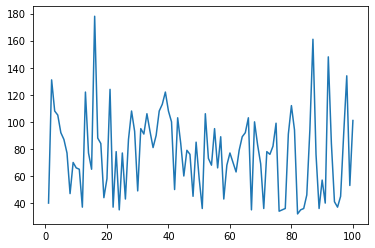

In [23]:
# 5.- Mostrar en un histograma la distribución de longitudes de descripción
plt.plot(df['numero'],lenDescrip)

In [8]:
# Grabamos el resultado como CSV separado por comas
CSVfilename = "numbers1000.csv"
df.to_csv(CSVfilename, index=False)

In [7]:
print(df)

    numero                                        descripcion
0      1.0             1 is the number of Gods in monotheism.
1      2.0  2 is the price in cents per acre the USA bough...
2      3.0  3 is cans of Spam consumed every second in the...
3      4.0  4 is the number of nucleobase types in DNA and...
4      5.0  5 is the number of Justices on the Supreme Cou...
..     ...                                                ...
95    96.0      96 is the rating of Skyrim on metacritic.com.
96    97.0  97 is the number of different characters that ...
97    98.0  98 is the highest jersey number allowed in the...
98    99.0  99 is the number of names of Allah, the names ...
99   100.0  100 is the number of common administrative gro...

[100 rows x 2 columns]
